In [1]:
import pandas as pd
import matplotlib as mp
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Linear Regression with one variable 

In [2]:
df0 = pd.read_csv('ex1data1.csv', header=None)

In [3]:
df0.columns=['Population', 'Profit']
#df0.plot(kind='scatter', x='', y='1', figsize=(12,8))
df0.insert(0, 'w0', 1)

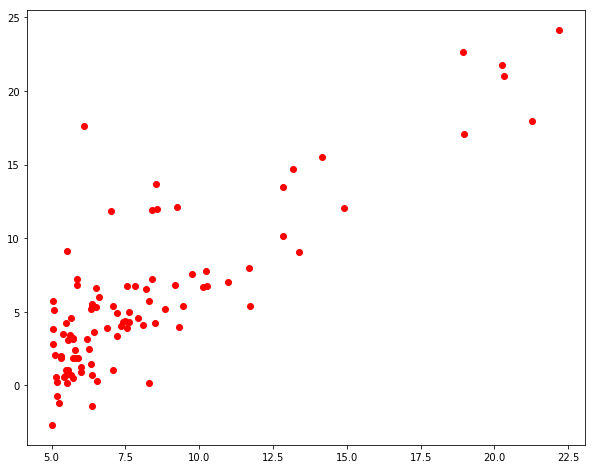

In [4]:
x=df0['Population'].values
y=df0['Profit'].values
plt.figure(figsize=(10,8))
plt.scatter(x, y,  c='red')
plt.show()

In [5]:
x = df0['Population'].values
x

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

In [6]:
def cost_function(x, y, w1, w0):
    total_cost = 0
    for i in range(len(x)):
        total_cost += np.power(((w1 * x[i] + w0) - y[i]),2)
    return total_cost / len(x)

In [7]:
oldCost = cost_function(x, y, 1, 1)
oldCost

20.533040982767009

In [8]:
def gradient_descent(x, y, w1, w0, alpha, iterations):
    inner_w1_deriv = 0
    inner_w0_deriv = 0
    #temp = 1
    cost = 0
    for _ in range(iterations):
        #cost
        inner_w1_deriv = 0
        inner_w0_deriv = 0
        for i in range(len(x)):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            inner_w1_deriv += (x[i] * ((w1*x[i]) - y[i]))
            inner_w0_deriv += ((w1*x[i]) - y[i])
        # We subtract because the derivatives point in direction of steepest ascent
        temp1 = w1 - (2 * (inner_w1_deriv / len(x)) * alpha)
        temp0 = w0 - (2 * (inner_w0_deriv / len(x)) * alpha)
        w1 = temp1
        w0 = temp0
        #temp = cost
        cost= cost_function(x, y, w1, w0)
#         if j % 10 == 0:
#             print "iter: "+str(j) + " cost: "+str(cost)
    return w1, w0, cost

In [9]:
alpha = 0.01
iterations = 100
w1, w0, cost = gradient_descent(x, y, 1, 1, alpha, iterations)

In [10]:
cost

11.287549032521689

In [11]:
print 'RMSE %f' % np.sqrt(cost)

RMSE 3.359695


In [12]:
w1

0.80252684920135675

In [13]:
w0

-0.4384414554300905

/Users/trininh/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


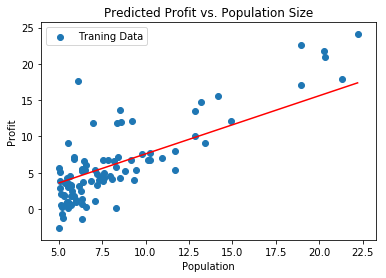

In [14]:
x1 = np.linspace(df0.Population.min(), df0.Population.max(), 100)
f = w1 * x1 + w0
fig, ax = plt.subplots()
ax.plot(x1, f, 'r')
ax.scatter(df0.Population, df0.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
fig.show()

### 2-1

In [15]:
df1 = pd.read_csv('ex1data2.csv', header=None)

In [16]:
df1.columns=['HouseSize', 'NumberOfBedrooms', 'HousePrice']

In [17]:
df1['HouseSize'] = (df1['HouseSize'] - df1['HouseSize'].mean()) / df1['HouseSize'].std()
df1['NumberOfBedrooms'] = (df1['NumberOfBedrooms'] - df1['NumberOfBedrooms'].mean()) / df1['NumberOfBedrooms'].std()

In [18]:
df1.insert(0, 'Ones', 1)

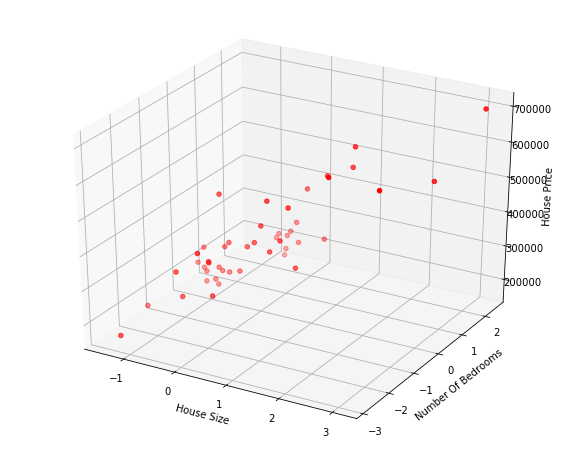

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
X = df1['HouseSize']
Y = df1['NumberOfBedrooms']
Z = df1['HousePrice']
ax.scatter(X, Y, Z, c = 'r')
ax.set_xlabel('House Size')
ax.set_ylabel('Number Of Bedrooms')
ax.set_zlabel('House Price')
plt.show()

In [20]:
x1 = np.matrix(df1.iloc[:, 0:3].values)
y1 = np.matrix(df1.iloc[:, 3:4].values)

In [31]:
# def cost_function_matrix(x, y, w):
#     total_cost = ((np.matmul(x,w) - y).T)*(np.matmul(x,w) - y)
# #     total_cost = (np.matmul(x, w) - y)**2
#     m = len(x)
#     cost = total_cost / m
#     return cost
    #return np.sum(np.square(np.matmul(x, w) - y)) / (2 * len(y))
m = y1.size
def h(w,x): #Linear hypothesis function
    return np.dot(x,w)

def cost_function_matrix(w,x,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(w,x)-y).T,(h(w,x)-y)))

In [33]:
w = np.zeros((3,1))
#w.reshape((2,1))
cost_function_matrix(w, x1, y1)

65591585744.68085

In [23]:
x1.shape, y1.shape, w.shape

((47, 3), (47, 1), (3, 1))

In [67]:
m

47

In [99]:
# w.reshape((2,1))
# parameters = int(w.ravel().shape[1])
# parameters
# def gradient_descent_matrix1(x, y, w, alpha, iterations):
#     temp = np.ones((3, 1))
#     w = np.ones((3,1))
#     m = len(x)
#     costs = np.zeros(iterations)
#     for i in range(iterations):
#         deriv = (2.0/m) * np.matmul((np.matmul(x, temp) - y).T, x) 
#         #deriv = (2.0/m) * np.matmul(x.T, np.matmul(x, w) - y)
#         #print deriv.shape
#         temp = temp - (alpha * deriv).T
#         costs[i] = cost_function_matrix(x, y, temp)
#     w = temp
#     return w, costs
def descendGradient(X, y, init_w):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    w = init_w
    costs = [] #Used to plot cost as function of iteration
    w_history = [] #Used to visualize the minimization path later on
    for i in xrange(iterations):
        temp = w
        costs.append(cost_function_matrix(w,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        w_history.append(list(w[:,0]))
        #error = (h(w, X) - y)
        #Simultaneously updating theta values
        for j in xrange(len(temp)):
            temp[j] = w[j] - (alpha/m)*np.sum((h(w, X) - y)*np.array(X[:,j]).T)
        w = temp
    return w, w_history, costs

In [73]:
iterations = 1000
alpha = 0.001
init_w = np.zeros((x1.shape[1],1))
w1, w1_history, costs1 = descendGradient(x1, y1, init_w)

In [74]:
w1

array([[  3.40412766e+05],
       [  9.27978730e-12],
       [  8.47965644e-11]])

In [75]:
print 'RMSE %f' % np.sqrt(cost_function_matrix(w1, x1, y1))

RMSE 87470.910200


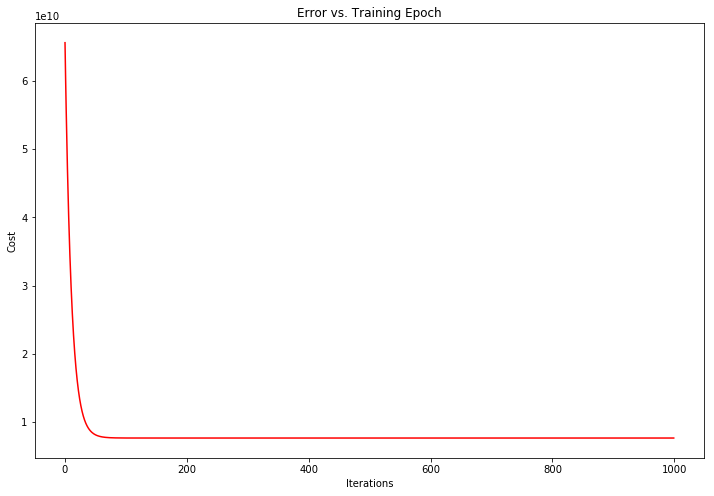

In [76]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iterations), costs1, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

### 2-2

In [184]:
from numpy.linalg import inv
def normal_equation(x, y):
    return inv(x.T.dot(x)).dot(x.T).dot(y)
w = normal_equation(x1, y1)
cost=cost_function_matrix(w, x1, y1)
print w
print cost
#print cost

[[ 340412.76595745]
 [ 110631.01899357]
 [  -6649.39536298]]
2043280477.39


In [185]:
print 'RMSE %f' % np.sqrt(cost)

RMSE 45202.660070


### 3-1

In [100]:
df2 = pd.read_csv('ex1data3.csv', index_col=0)

In [101]:
X = df2.iloc[:,0:8].values
Y = df2.iloc[:, 8:9].values

In [102]:
X2 = np.matrix(X)
Y2 = np.matrix(Y)
w3 = np.ones(X2.shape[1])

In [103]:
X2

matrix([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ..., 
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]])

In [104]:
def feature_normalize(x):
    numberOfFeatures = x.shape[1]
    means = np.array([np.mean(x[:,i]) for i in range(numberOfFeatures)])
    stds = np.array([np.std(x[:,i]) for i in range(numberOfFeatures)])
    normalized = (x - means) / stds

    return normalized

In [113]:
#X_norm = data.as_matrix(X)
X_norm = feature_normalize(df2.iloc[:,0:8].values)

In [114]:
#X_norm1 = np.concatenate(np.ones(shape=(20640,1)), X_norm, axis=1)
X_norm1 = np.insert(X_norm, 0, 1, axis=1)

In [115]:
X_norm1.shape

(20640, 9)

In [118]:
matrix_x = np.matrix(X_norm1)

In [175]:
# def gradient_descent_matrix2(x, y, w, alpha, iterations):
#     w = np.zeros((x.shape[1], 1))
#     #w = w.reshape((x.shape[1],1))
#     m = len(X)
#     costs = np.zeros(iterations)
#     for i in range(iterations):
#         deriv = (2.0/m) * np.matmul(x.T, np.matmul(x, w)- y)
#         w = w - alpha * deriv
#         costs[i] = cost_function_matrix(x, y, w)
#     return w, costs
def gradientDescent2(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros((theta.shape[0],1)))
    parameters = int(theta.ravel().shape[0])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[j] = theta[j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = cost_function_matrix(theta, X, y)

    return theta, cost

In [176]:
alpha = 0.01
iterations = 1000
init_w = np.zeros((X_norm1.shape[1], 1))
w5, costs5 = gradientDescent2(matrix_x, Y2, init_w, alpha, iterations)

In [177]:
temp = np.matrix(np.zeros((init_w.shape[0],1)))
temp[2]

matrix([[ 0.]])

In [178]:
w5

matrix([[ 2.06846887],
        [ 0.81659877],
        [ 0.17689017],
        [-0.12729893],
        [ 0.14127008],
        [ 0.0166395 ],
        [-0.04392099],
        [-0.48604502],
        [-0.44967077]])

In [172]:
costs5

array([ 1210.11655077,  1188.75282301,  1167.81874126,  1147.30555168,
        1127.20468216,  1107.50773849,  1088.20650045,  1069.29291818,
        1050.7591085 ,  1032.59735139,  1014.80008644,   997.35990956,
         980.26956954,   963.52196491,   947.11014069,   931.0272853 ,
         915.26672757,   899.82193369,   884.68650436,   869.85417195,
         855.3187977 ,   841.07436902,   827.11499681,   813.4349129 ,
         800.02846746,   786.89012657,   774.01446974,   761.39618754,
         749.03007929,   736.9110508 ,   725.03411207,   713.39437519,
         701.98705217,   690.80745287,   679.85098294,   669.11314184,
         658.58952088,   648.2758013 ,   638.16775243,   628.26122983,
         618.5521735 ,   609.03660615,   599.71063146,   590.57043241,
         581.61226967,   572.83247992,   564.22747435,   555.79373707,
         547.52782364,   539.42635957,   531.48603888,   523.70362269,
         516.07593785,   508.59987557,   501.27239009,   494.09049739,
      

In [179]:
print 'RMSE %f' % float(np.sqrt(cost_function_matrix(w5, X_norm1, Y2)))

RMSE 11.019735


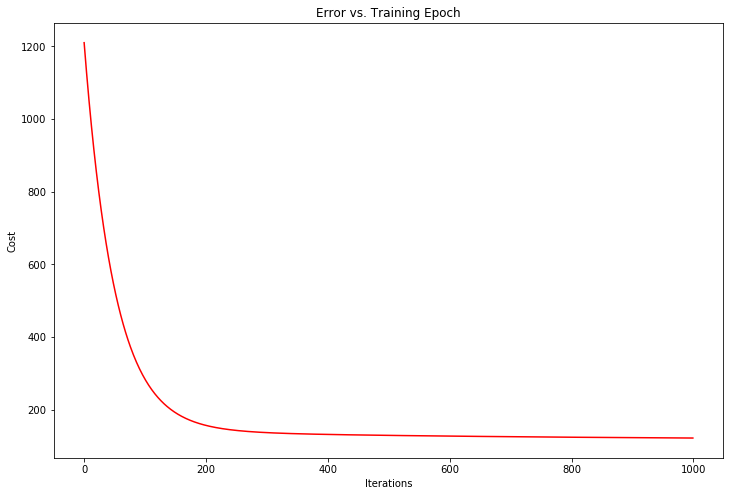

In [180]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iterations), costs5, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

### 3-2

In [187]:
w6 = normal_equation(matrix_x, Y2)
cost6=cost_function_matrix(w6, matrix_x, Y2)

In [188]:
w6

matrix([[ 2.06855817],
        [ 0.8296193 ],
        [ 0.11875165],
        [-0.26552688],
        [ 0.30569623],
        [-0.004503  ],
        [-0.03932627],
        [-0.89988565],
        [-0.870541  ]])

In [190]:
print 'RMSE %f' % np.sqrt(cost6)

RMSE 10.729748


### 3-3

In [191]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_norm, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [195]:
print 'Weights:'
print reg.coef_

Weights:
[[ 0.8296193   0.11875165 -0.26552688  0.30569623 -0.004503   -0.03932627
  -0.89988565 -0.870541  ]]


In [194]:
from sklearn.metrics import mean_squared_error
print 'RMSE: %f' % np.sqrt(mean_squared_error(reg.predict(X_norm), Y2))

RMSE: 0.724100


### 3-4

In [2176]:
import tensorflow as tf

In [2177]:
m = X_norm.shape[0]
n = X_norm.shape[1]
X_train = tf.placeholder(tf.float32, [m,n])
Y_train = tf.placeholder(tf.float32, [m,1])
weights = tf.Variable(tf.zeros([n,1], dtype=np.float32), name='weight')
bias = tf.Variable(tf.zeros([1], dtype=np.float32), name='bias')

In [2178]:
learning_rate = 0.1
iterations = 5000
cost_history = np.empty(shape=[1],dtype=float)
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [2179]:
y_hat = tf.add(tf.matmul(X_train, weights), bias)
cost = tf.reduce_mean(tf.square(y_hat - Y_train))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [2180]:

#costs = np.empty(shape=[1], dtype=float)
#costs = np.zeros(iterations)

sess = tf.Session()
sess.run(init)

for i in range(1, iterations):
    sess.run(optimizer, feed_dict={
        X_train: X_norm,
        Y_train: Y2
    })
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X_train: X_norm,Y_train: Y2}))

print('bias:', sess.run(bias))
print('weights:', sess.run(weights))

('bias:', array([ 2.06855774], dtype=float32))
('weights:', array([[ 0.82962048],
       [ 0.11875186],
       [-0.26552892],
       [ 0.30569792],
       [-0.00450296],
       [-0.03932633],
       [-0.89988297],
       [-0.87053841]], dtype=float32))


In [2182]:
pred_y = sess.run(y_hat, feed_dict={X_train: X_norm})
mse = tf.reduce_mean(tf.square(pred_y - Y2))
print "RMSE: %.4f" % np.sqrt(sess.run(mse)) 

RMSE: 0.7241


In [2183]:
sess.close()